# SVD 추천 시스템 작성

In [133]:
import pandas as pd
from surprise.model_selection import train_test_split
from surprise import SVD
from surprise import accuracy
from surprise.model_selection import cross_validate


In [134]:
#file_path = "C:\\Users\\82103\\Upstage AI Lab\\Olive_RecSys\\upstage-ailab-ml-project\\RecSys_Model\\temp_data\\konlpy.csv"
file_path = "/Users/soom/Workspace/Upstageailab/[ML]Olive_RecSys/upstage-ailab-ml-project/data/Soomin/sentiment_df.csv"
df = pd.read_csv(file_path, encoding="UTF-8",index_col=0)
#df.drop("Unnamed: 0",axis=1, inplace= True)
df

,user_id,user_code,brand_name,product_name,review,review_rating,review_date,purchase_channel,recommend_num,cleaned_review,sentiment_label,Sentiment Score,Sentiment_Label_Pred
0,00****,UGVjbFozKzl2UkFTYTlyZ1JmSGlJUT09,리얼베리어,[극강 보습] 리얼베리어 익스트림 크림 70ml 1+1 기획 (+선크림 10ml),오늘아침에 배송와서 사용해보니 저안테 맞는거같아여 점점사용해보면 알거같아여,5,2024.09.03,온라인,0,오늘아침 배송 서다 사용 해보다 안테 맞다 같다 점점 사용 해보다 알다 같다,1,-0.090909,0
1,00****,SU1LSWJaU05rVjRIWnA4ZFJxR3hVUT09,라운드랩,[최혜선 PICK/1등썬] 라운드랩 자작나무 수분 선크림 50ml 기획 (+클렌저 ...,두 통째 쓰고있는 제품입니당 너무너무너무 좋아요ㅠㅠ\n톤 보정은 약간 있는것 같고 ...,5,2024.09.18,온라인,0,두 통째 쓰다 제품 이다 좋다 톤 보정 약간 있다 같다 자극 순하다 좋다 제 무기 ...,1,0.161290,1
2,00****,UGVjbFozKzl2UkFTYTlyZ1JmSGlJUT09,리쥬란,리쥬란 힐러 스킨 프로텍션 마스크 5매,이제 9월이라고 너무 덥지만 건조함이 오긴오더라구여 그렇게 기능성은 아니지만 가격 ...,5,2024.09.01,온라인,0,이제 월 덥다 건조하다 오다 구 기능 성은 아니다 가격 세 이다 구매 하다,1,0.090909,1
3,000kj****,WXRmd0R4MndYaG1IdEg5cXJTcnliZz09,3CE,[10월 올영픽] 3CE 소프트 매트 립스틱,<구매 이유>\n저는 웜 쿨 중 나누자면 웜톤인데\n완전 웜톤 색조를 하면 안어울리...,5,2024.09.16,매장,1,구매 이유 저 웜 쿨 중 나누다 웜톤 완전 웜톤 색조 하다 어울리다 미지 인간 요 ...,1,0.104167,1
4,001****,YlJldTJsZmRZR25LOEdXQ2thNThEQT09,필리밀리,필리밀리 포인트 가닥 속눈썹 04 A쉐입 (90P),구매 상품 잘 받았습니다..\n무난한 가격에 수량이 넉넉해서 좋아요..,5,2024.09.22,온라인,0,구매 상품 자다 받다 무난 가격 수량 넉넉하다 좋다,1,0.111111,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
261911,힝이2,VFpjaGxDMDc0NmkvSm5yblgrS2hTQT09,메디힐,[6년연속1위/단독기획] 메디힐 에센셜 마스크 10+1매 기획 5종 택 1,피부가 많이 붉어져서 샀는데 좋아요! 1일1팩 하니 진정된 느낌입니다,5,2023.05.02,온라인,0,피부 붉다 사다 좋다 팩 하니 진정 되다 느낌 이다,1,0.333333,1
261912,힝이2,VFpjaGxDMDc0NmkvSm5yblgrS2hTQT09,바이오더마,바이오더마 아토덤 립스틱 1+1 기획 (저자극 립밤),역시 좋아요! 화장하고 립 바르기 전에 바르는데 촉촉해서 몇통째 쓰고있어요!,5,2023.04.12,매장,0,역시 좋다 화장 립 바르다 전 바르다 촉촉하다 통째 쓰다,1,0.750000,1
261913,힝이2,VFpjaGxDMDc0NmkvSm5yblgrS2hTQT09,어노브,어노브 실크 오일 헤어에센스 70ml 2종 택1 (텐더블룸/웜페탈),꾸덕하고 바르고 나면 머릿결이 촉촉해 지는것 같아요 무난무난 하게 쓰기 좋네요!,5,2022.08.28,매장,0,꾸다 덕 바르다 나다 머릿결 촉촉하다 지다 같다 무난 무난 하다 쓰기 좋다,1,0.333333,1
261914,힝이2,VFpjaGxDMDc0NmkvSm5yblgrS2hTQT09,유리아쥬,유리아쥬 스틱레브르 오리지널 보습 립밤 더블기획 (4g +4g),싸고 보습이 좋아서 행사때 마다 이용해요! 타사 제품이랑 비슷한데 가격이 싸요,5,2022.03.12,매장,0,싸다 보습 좋다 행사 때 마다 이용 하다 타다 제품 비슷하다 가격 싸다,1,-0.166667,0


In [135]:
import pandas as pd
import numpy as np
def calculate_repurchase(purchase_history_df):
    # 사용자와 제품별로 구매 횟수를 계산
    purchase_counts = purchase_history_df.groupby(['user_code', 'product_name']).size().reset_index(name='repurchase')
    
    # 'repurchase' 열에서 1번 구매한 경우를 제외하고, 재구매만 표시
    #purchase_counts['repurchase'] = purchase_counts['repurchase'].apply(lambda x: x - 1 if x > 1 else 0)
      # 'user_code'와 'product_name'을 기준으로 원래 데이터프레임과 병합
    purchase_history_df = pd.merge(purchase_history_df, purchase_counts, on=['user_code', 'product_name'], how='left')

    return purchase_history_df

# 재구매 횟수를 계산하여 새로운 데이터프레임 생성
df = calculate_repurchase(df)
df['repurchase'] = np.clip(df['repurchase'], 1, 4)
df


,user_id,user_code,brand_name,product_name,review,review_rating,review_date,purchase_channel,recommend_num,cleaned_review,sentiment_label,Sentiment Score,Sentiment_Label_Pred,repurchase
0,00****,UGVjbFozKzl2UkFTYTlyZ1JmSGlJUT09,리얼베리어,[극강 보습] 리얼베리어 익스트림 크림 70ml 1+1 기획 (+선크림 10ml),오늘아침에 배송와서 사용해보니 저안테 맞는거같아여 점점사용해보면 알거같아여,5,2024.09.03,온라인,0,오늘아침 배송 서다 사용 해보다 안테 맞다 같다 점점 사용 해보다 알다 같다,1,-0.090909,0,1
1,00****,SU1LSWJaU05rVjRIWnA4ZFJxR3hVUT09,라운드랩,[최혜선 PICK/1등썬] 라운드랩 자작나무 수분 선크림 50ml 기획 (+클렌저 ...,두 통째 쓰고있는 제품입니당 너무너무너무 좋아요ㅠㅠ\n톤 보정은 약간 있는것 같고 ...,5,2024.09.18,온라인,0,두 통째 쓰다 제품 이다 좋다 톤 보정 약간 있다 같다 자극 순하다 좋다 제 무기 ...,1,0.161290,1,1
2,00****,UGVjbFozKzl2UkFTYTlyZ1JmSGlJUT09,리쥬란,리쥬란 힐러 스킨 프로텍션 마스크 5매,이제 9월이라고 너무 덥지만 건조함이 오긴오더라구여 그렇게 기능성은 아니지만 가격 ...,5,2024.09.01,온라인,0,이제 월 덥다 건조하다 오다 구 기능 성은 아니다 가격 세 이다 구매 하다,1,0.090909,1,1
3,000kj****,WXRmd0R4MndYaG1IdEg5cXJTcnliZz09,3CE,[10월 올영픽] 3CE 소프트 매트 립스틱,<구매 이유>\n저는 웜 쿨 중 나누자면 웜톤인데\n완전 웜톤 색조를 하면 안어울리...,5,2024.09.16,매장,1,구매 이유 저 웜 쿨 중 나누다 웜톤 완전 웜톤 색조 하다 어울리다 미지 인간 요 ...,1,0.104167,1,1
4,001****,YlJldTJsZmRZR25LOEdXQ2thNThEQT09,필리밀리,필리밀리 포인트 가닥 속눈썹 04 A쉐입 (90P),구매 상품 잘 받았습니다..\n무난한 가격에 수량이 넉넉해서 좋아요..,5,2024.09.22,온라인,0,구매 상품 자다 받다 무난 가격 수량 넉넉하다 좋다,1,0.111111,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261911,힝이2,VFpjaGxDMDc0NmkvSm5yblgrS2hTQT09,메디힐,[6년연속1위/단독기획] 메디힐 에센셜 마스크 10+1매 기획 5종 택 1,피부가 많이 붉어져서 샀는데 좋아요! 1일1팩 하니 진정된 느낌입니다,5,2023.05.02,온라인,0,피부 붉다 사다 좋다 팩 하니 진정 되다 느낌 이다,1,0.333333,1,2
261912,힝이2,VFpjaGxDMDc0NmkvSm5yblgrS2hTQT09,바이오더마,바이오더마 아토덤 립스틱 1+1 기획 (저자극 립밤),역시 좋아요! 화장하고 립 바르기 전에 바르는데 촉촉해서 몇통째 쓰고있어요!,5,2023.04.12,매장,0,역시 좋다 화장 립 바르다 전 바르다 촉촉하다 통째 쓰다,1,0.750000,1,4
261913,힝이2,VFpjaGxDMDc0NmkvSm5yblgrS2hTQT09,어노브,어노브 실크 오일 헤어에센스 70ml 2종 택1 (텐더블룸/웜페탈),꾸덕하고 바르고 나면 머릿결이 촉촉해 지는것 같아요 무난무난 하게 쓰기 좋네요!,5,2022.08.28,매장,0,꾸다 덕 바르다 나다 머릿결 촉촉하다 지다 같다 무난 무난 하다 쓰기 좋다,1,0.333333,1,1
261914,힝이2,VFpjaGxDMDc0NmkvSm5yblgrS2hTQT09,유리아쥬,유리아쥬 스틱레브르 오리지널 보습 립밤 더블기획 (4g +4g),싸고 보습이 좋아서 행사때 마다 이용해요! 타사 제품이랑 비슷한데 가격이 싸요,5,2022.03.12,매장,0,싸다 보습 좋다 행사 때 마다 이용 하다 타다 제품 비슷하다 가격 싸다,1,-0.166667,0,1


In [136]:

# 구매 횟수 중 최대값을 구함
df.groupby(['user_code', 'product_name']).size().max()


296

In [137]:
df['senti_score'] = df['Sentiment Score']+df['review_rating'].fillna(0)
df['senti_rp_score']= df['senti_score']+df["repurchase"]

In [138]:
from surprise import Dataset
from surprise import Reader
import numpy as np
# rating_scale=(최소 평점, 최대 평점)을 설정해줍니다 (예시: 평점 범위가 1~5)
df['senti_rp_score'] = np.clip(df['senti_rp_score'], 1, 10)
reader = Reader(rating_scale=(1, 10))

# userId, movieId, rating 컬럼만 선택하여 Surprise 데이터셋으로 변환
data = Dataset.load_from_df(df[['user_code', 'product_name', 'senti_rp_score']], reader)



In [173]:
from surprise import SVD
from surprise import accuracy
from surprise.model_selection import train_test_split
import mlflow
import mlflow.sklearn
from itertools import product

mlflow.autolog()

# Set MLflow tracking URI and experiment
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment('Olive-RecSys')
# 학습 데이터와 테스트 데이터로 분할
trainset, testset = train_test_split(data, test_size=0.25)

n_factors = [10,20,30,40,50,60,100]
n_epochs = [10,20,30,40,50]

def new_func(a, l1, model):
    model.fit(trainset)
    # 테스트 데이터에 대한 예측
    predictions = model.test(testset)
    # 예측 성능 평가 (RMSE 계산)
    rmse = accuracy.rmse(predictions)

    # Log parameters and metrics
    mlflow.log_param("n_factors", a)
    mlflow.log_param("n_epochs", l1)
    mlflow.log_metric("rmse", rmse)
    return rmse

for a, l1 in product(n_factors, n_epochs):
    with mlflow.start_run(nested=True):
            # SVD 모델 생성 및 학습
        model = SVD(n_factors = a,n_epochs=l1)
        rmse =  new_func(a, l1, model)
        print(f"RMSE: {rmse}, n_factor : {a}, n_epoch : {l1}")


2024/10/11 09:31:33 INFO mlflow.tracking._tracking_service.client: 🏃 View run blushing-loon-420 at: http://127.0.0.1:5000/#/experiments/873372003165614940/runs/465fc249c8104bd1a887e49e69e46f17.
2024/10/11 09:31:33 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/873372003165614940.


RMSE: 1.0960
RMSE: 1.0959661808158478, n_factor : 10, n_epoch : 10


2024/10/11 09:31:34 INFO mlflow.tracking._tracking_service.client: 🏃 View run peaceful-ram-665 at: http://127.0.0.1:5000/#/experiments/873372003165614940/runs/1a208784d2a949c4bcc1c80630ea5105.
2024/10/11 09:31:34 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/873372003165614940.


RMSE: 1.0106
RMSE: 1.0106210719280637, n_factor : 10, n_epoch : 20


2024/10/11 09:31:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run brawny-gull-317 at: http://127.0.0.1:5000/#/experiments/873372003165614940/runs/29d04160f3e34151b6cf87f91a01c9e5.
2024/10/11 09:31:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/873372003165614940.


RMSE: 0.9803
RMSE: 0.9803345147189575, n_factor : 10, n_epoch : 30


2024/10/11 09:31:38 INFO mlflow.tracking._tracking_service.client: 🏃 View run gentle-chimp-867 at: http://127.0.0.1:5000/#/experiments/873372003165614940/runs/f75e647bcb2a4509a9ac8abe2abb142b.
2024/10/11 09:31:38 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/873372003165614940.


RMSE: 0.9656
RMSE: 0.9656082016409614, n_factor : 10, n_epoch : 40


2024/10/11 09:31:41 INFO mlflow.tracking._tracking_service.client: 🏃 View run marvelous-crab-802 at: http://127.0.0.1:5000/#/experiments/873372003165614940/runs/e8b1972be3fc4ac6b0837d766c67f06a.
2024/10/11 09:31:41 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/873372003165614940.


RMSE: 0.9660
RMSE: 0.9660403490525442, n_factor : 10, n_epoch : 50


2024/10/11 09:31:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run charming-owl-4 at: http://127.0.0.1:5000/#/experiments/873372003165614940/runs/14eca76334ef4483b22bd62ad4e53f9d.
2024/10/11 09:31:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/873372003165614940.


RMSE: 1.0619
RMSE: 1.0618537002278605, n_factor : 20, n_epoch : 10


2024/10/11 09:31:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run capricious-fish-723 at: http://127.0.0.1:5000/#/experiments/873372003165614940/runs/efdcabb902154496a85874a112531899.
2024/10/11 09:31:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/873372003165614940.


RMSE: 0.9482
RMSE: 0.9481735538439946, n_factor : 20, n_epoch : 20


2024/10/11 09:31:45 INFO mlflow.tracking._tracking_service.client: 🏃 View run zealous-trout-252 at: http://127.0.0.1:5000/#/experiments/873372003165614940/runs/4853b60b5346496e920bd1086c6d6171.
2024/10/11 09:31:45 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/873372003165614940.


RMSE: 0.9081
RMSE: 0.9081410849793403, n_factor : 20, n_epoch : 30


2024/10/11 09:31:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run luxuriant-doe-291 at: http://127.0.0.1:5000/#/experiments/873372003165614940/runs/73241d4d69e24d7b844806f2a594716d.
2024/10/11 09:31:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/873372003165614940.


RMSE: 0.8927
RMSE: 0.8926659609792472, n_factor : 20, n_epoch : 40


2024/10/11 09:31:51 INFO mlflow.tracking._tracking_service.client: 🏃 View run unruly-squid-270 at: http://127.0.0.1:5000/#/experiments/873372003165614940/runs/408e5e22b3354130911a45c456409f6c.
2024/10/11 09:31:51 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/873372003165614940.


RMSE: 0.8797
RMSE: 0.8797438470279306, n_factor : 20, n_epoch : 50


2024/10/11 09:31:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run dazzling-lark-638 at: http://127.0.0.1:5000/#/experiments/873372003165614940/runs/425e3325b0194ca8b260e11094093bf3.
2024/10/11 09:31:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/873372003165614940.


RMSE: 1.0346
RMSE: 1.0345834536314649, n_factor : 30, n_epoch : 10


2024/10/11 09:31:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run able-shark-193 at: http://127.0.0.1:5000/#/experiments/873372003165614940/runs/3d0bbc37708a46c0bf0e074851d641aa.
2024/10/11 09:31:54 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/873372003165614940.


RMSE: 0.9057
RMSE: 0.905703815219732, n_factor : 30, n_epoch : 20


2024/10/11 09:31:56 INFO mlflow.tracking._tracking_service.client: 🏃 View run upbeat-elk-500 at: http://127.0.0.1:5000/#/experiments/873372003165614940/runs/bca470ce2ae9441ca644398d5c0cf925.
2024/10/11 09:31:56 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/873372003165614940.


RMSE: 0.8649
RMSE: 0.8648787786751038, n_factor : 30, n_epoch : 30


2024/10/11 09:31:59 INFO mlflow.tracking._tracking_service.client: 🏃 View run resilient-zebra-412 at: http://127.0.0.1:5000/#/experiments/873372003165614940/runs/d4d748f1844c4748867446206be813a1.
2024/10/11 09:31:59 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/873372003165614940.


RMSE: 0.8484
RMSE: 0.8484000154966926, n_factor : 30, n_epoch : 40


2024/10/11 09:32:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run capable-bat-269 at: http://127.0.0.1:5000/#/experiments/873372003165614940/runs/e41d9cd191d245a5bd44aa693cb63bef.
2024/10/11 09:32:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/873372003165614940.


RMSE: 0.8376
RMSE: 0.8376047981902436, n_factor : 30, n_epoch : 50


2024/10/11 09:32:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run placid-slug-366 at: http://127.0.0.1:5000/#/experiments/873372003165614940/runs/80b0efa894a847a9b6bb5b6ec7119163.
2024/10/11 09:32:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/873372003165614940.


RMSE: 1.0118
RMSE: 1.0118119799544563, n_factor : 40, n_epoch : 10


2024/10/11 09:32:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run classy-snail-619 at: http://127.0.0.1:5000/#/experiments/873372003165614940/runs/780b9c762581430e865ee66932a76741.
2024/10/11 09:32:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/873372003165614940.


RMSE: 0.8778
RMSE: 0.8777782398904918, n_factor : 40, n_epoch : 20


2024/10/11 09:32:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run carefree-crow-886 at: http://127.0.0.1:5000/#/experiments/873372003165614940/runs/722e5e16b52d4cbab3267816e776e821.
2024/10/11 09:32:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/873372003165614940.


RMSE: 0.8362
RMSE: 0.8361939199836472, n_factor : 40, n_epoch : 30


2024/10/11 09:32:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run ambitious-owl-539 at: http://127.0.0.1:5000/#/experiments/873372003165614940/runs/6fa0f3bf88b24daabf39a51a6f160626.
2024/10/11 09:32:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/873372003165614940.


RMSE: 0.8209
RMSE: 0.8209084730201783, n_factor : 40, n_epoch : 40


2024/10/11 09:32:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run defiant-hawk-376 at: http://127.0.0.1:5000/#/experiments/873372003165614940/runs/aaf054f78c3640d9805ac42bf54c9a3b.
2024/10/11 09:32:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/873372003165614940.


RMSE: 0.8127
RMSE: 0.8126830690321603, n_factor : 40, n_epoch : 50


2024/10/11 09:32:17 INFO mlflow.tracking._tracking_service.client: 🏃 View run likeable-dog-602 at: http://127.0.0.1:5000/#/experiments/873372003165614940/runs/9043968a5e704db9b439202736df24f7.
2024/10/11 09:32:17 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/873372003165614940.


RMSE: 0.9955
RMSE: 0.9955276731257265, n_factor : 50, n_epoch : 10


2024/10/11 09:32:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run worried-stork-732 at: http://127.0.0.1:5000/#/experiments/873372003165614940/runs/357d11e8f37e4a6a9d51dfdd26a28ab5.
2024/10/11 09:32:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/873372003165614940.


RMSE: 0.8642
RMSE: 0.8642302501462371, n_factor : 50, n_epoch : 20


2024/10/11 09:32:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run redolent-gull-217 at: http://127.0.0.1:5000/#/experiments/873372003165614940/runs/90e6db92790c4c7d969129cea2259be3.
2024/10/11 09:32:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/873372003165614940.


RMSE: 0.8226
RMSE: 0.8225638620314791, n_factor : 50, n_epoch : 30


2024/10/11 09:32:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run mysterious-doe-205 at: http://127.0.0.1:5000/#/experiments/873372003165614940/runs/fe3ed745a601471190bdf5f97d9d1e00.
2024/10/11 09:32:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/873372003165614940.


RMSE: 0.8036
RMSE: 0.8035687475980702, n_factor : 50, n_epoch : 40


2024/10/11 09:32:31 INFO mlflow.tracking._tracking_service.client: 🏃 View run illustrious-gull-879 at: http://127.0.0.1:5000/#/experiments/873372003165614940/runs/a47f6d034fa641dea09641dcef5b8cd7.
2024/10/11 09:32:31 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/873372003165614940.


RMSE: 0.7961
RMSE: 0.7960987615529573, n_factor : 50, n_epoch : 50


2024/10/11 09:32:33 INFO mlflow.tracking._tracking_service.client: 🏃 View run colorful-duck-989 at: http://127.0.0.1:5000/#/experiments/873372003165614940/runs/578fc309b3f14d64be008f74947687d3.
2024/10/11 09:32:33 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/873372003165614940.


RMSE: 0.9819
RMSE: 0.9819318598437417, n_factor : 60, n_epoch : 10


2024/10/11 09:32:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run intelligent-deer-897 at: http://127.0.0.1:5000/#/experiments/873372003165614940/runs/5bee411314044285926b17e4e0a74c91.
2024/10/11 09:32:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/873372003165614940.


RMSE: 0.8492
RMSE: 0.8491567581071359, n_factor : 60, n_epoch : 20


2024/10/11 09:32:38 INFO mlflow.tracking._tracking_service.client: 🏃 View run chill-hen-779 at: http://127.0.0.1:5000/#/experiments/873372003165614940/runs/6de6a51676fd46a5af51dc07e9eb02dc.
2024/10/11 09:32:38 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/873372003165614940.


RMSE: 0.8073
RMSE: 0.8073489020199958, n_factor : 60, n_epoch : 30


2024/10/11 09:32:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run salty-sheep-520 at: http://127.0.0.1:5000/#/experiments/873372003165614940/runs/c7bad9acfea8425ba2c94ce5d296a425.
2024/10/11 09:32:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/873372003165614940.


RMSE: 0.7940
RMSE: 0.7940028452473887, n_factor : 60, n_epoch : 40


2024/10/11 09:32:46 INFO mlflow.tracking._tracking_service.client: 🏃 View run calm-auk-196 at: http://127.0.0.1:5000/#/experiments/873372003165614940/runs/4294e6a6653344ed9e81688ad210c605.
2024/10/11 09:32:46 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/873372003165614940.


RMSE: 0.7890
RMSE: 0.78896878880371, n_factor : 60, n_epoch : 50


2024/10/11 09:32:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run serious-deer-598 at: http://127.0.0.1:5000/#/experiments/873372003165614940/runs/7afb285ff9bb4995a5c511b68e8e15cc.
2024/10/11 09:32:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/873372003165614940.


RMSE: 0.9437
RMSE: 0.9436695033811199, n_factor : 100, n_epoch : 10


2024/10/11 09:32:51 INFO mlflow.tracking._tracking_service.client: 🏃 View run dazzling-ape-442 at: http://127.0.0.1:5000/#/experiments/873372003165614940/runs/7d883975b16c46e48feac4145f0fddee.
2024/10/11 09:32:51 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/873372003165614940.


RMSE: 0.8164
RMSE: 0.8164104752150991, n_factor : 100, n_epoch : 20


2024/10/11 09:32:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run peaceful-shark-357 at: http://127.0.0.1:5000/#/experiments/873372003165614940/runs/9e1ad44611a848ea979a761fca6608bd.
2024/10/11 09:32:54 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/873372003165614940.


RMSE: 0.7827
RMSE: 0.7827084271401824, n_factor : 100, n_epoch : 30


2024/10/11 09:32:58 INFO mlflow.tracking._tracking_service.client: 🏃 View run selective-kit-753 at: http://127.0.0.1:5000/#/experiments/873372003165614940/runs/b0d4124470e24f04bda4c71e262bcfb5.
2024/10/11 09:32:58 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/873372003165614940.


RMSE: 0.7733
RMSE: 0.7733131101935978, n_factor : 100, n_epoch : 40


2024/10/11 09:33:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run victorious-goose-664 at: http://127.0.0.1:5000/#/experiments/873372003165614940/runs/b1b06678429044339c5683f27a3fd1e7.
2024/10/11 09:33:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/873372003165614940.


RMSE: 0.7704
RMSE: 0.7704249852972455, n_factor : 100, n_epoch : 50


In [175]:
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
import numpy as np

# Reader 객체 생성 (평점 범위 설정)
df['senti_rp_score'] = np.clip(df['senti_rp_score'], 1, 10)
reader = Reader(rating_scale=(1, 10))

# pandas DataFrame을 Surprise Dataset 형식으로 변환
data = Dataset.load_from_df(df[['user_code', 'product_name', 'senti_rp_score']], reader)

# 학습 데이터와 테스트 데이터로 분할
trainset, testset = train_test_split(data, test_size=0.25)

# SVD 모델 생성 및 학습
model = SVD(n_epochs=50, n_factors=100)
model.fit(trainset)

def get_seen_items(df, user_id):
    """
    사용자가 평가한(구매한) 제품 목록을 반환하는 함수
    """
    return set(df[df['user_code'] == user_id]['product_name'])

def get_top_n_recommendations(user_id, model, trainset, all_product_ids, df, n=10):
    """
    유저 기반 추천, 유저가 없는 경우 가장 많이 구매된 제품을 추천하는 함수
    """
    # 사용자가 평가한 제품 목록을 가져옴
    seen_items = get_seen_items(df, user_id)
    
    # 만약 해당 사용자가 존재하지 않거나 본 제품이 없을 경우 (콜드 스타트)
    if len(seen_items) == 0:
        print(f"유저 '{user_id}'는 콜드 스타트 상태입니다. 가장 많이 구매된 제품을 추천합니다.")
        # 제품별 구매 횟수 집계
        top_products = df['product_name'].value_counts().head(n).index.tolist()
        return [(product, np.nan) for product in top_products]
    
    # 사용자가 보지 않은 제품 목록
    unseen_items = [item_id for item_id in all_product_ids if item_id not in seen_items]
    
    # 보지 않은 제품에 대한 예측 평점 계산
    predictions = []
    for item_id in unseen_items:
        pred = model.predict(user_id, item_id).est
        predictions.append((item_id, pred))
    
    # 예측 평점을 기준으로 상위 n개의 제품 추천
    predictions.sort(key=lambda x: x[1], reverse=True)
    return predictions[:n]

# 전체 제품 목록
all_product_ids = df['product_name'].unique()

# 특정 사용자(user_id=1)에게 제품 추천
user_id = 'ㅇㅇㅇ'
top_n_recommendations = get_top_n_recommendations(user_id, model, trainset, all_product_ids, df, n=10)

# 추천 결과 출력
for item_id, rating in top_n_recommendations:
    if np.isnan(rating):
        print(f"콜드 스타트 추천 제품: {item_id}")
    else:
        print(f"제품명 : {item_id}, 예측 평점: {rating:.2f}")

유저 'ㅇㅇㅇ'는 콜드 스타트 상태입니다. 가장 많이 구매된 제품을 추천합니다.
콜드 스타트 추천 제품: [6년연속1위] 메디힐 에센셜 마스크팩 1매 6종 택1
콜드 스타트 추천 제품: [립1위]롬앤 쥬시 래스팅 틴트
콜드 스타트 추천 제품: [NEW컬러] 홀리카홀리카 마이페이브 피스 아이섀도우
콜드 스타트 추천 제품: 페리페라 잉크 무드 글로이 틴트 (+틴트잼키링 증정 기획)
콜드 스타트 추천 제품: [NEW컬러] 투쿨포스쿨 프로타주 펜슬 샤프너 증정기획(9,11,14,15호 한정)
콜드 스타트 추천 제품: 린제이 모델링 마스크 7종 택1
콜드 스타트 추천 제품: [NEW컬러추가] 웨이크메이크 소프트 블러링 아이팔레트 (기획/단품)
콜드 스타트 추천 제품: [1매] 넘버즈인 1번~5번 마스크팩 5종 중 택 1
콜드 스타트 추천 제품: 브링그린 프레시마스크 1매 5종
콜드 스타트 추천 제품: [NEW기획출시] 투크 워터프루프 슬림 아이라이너 15colors (기획/단품)


In [174]:
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split

# Reader 객체 생성 (평점 범위 설정)
df['senti_rp_score'] = np.clip(df['senti_rp_score'], 1, 10)
reader = Reader(rating_scale=(1, 10))

# pandas DataFrame을 Surprise Dataset 형식으로 변환
data = Dataset.load_from_df(df[['user_code', 'product_name', 'senti_rp_score']], reader)

# 학습 데이터와 테스트 데이터로 분할
trainset, testset = train_test_split(data, test_size=0.25)

# SVD 모델 생성 및 학습
model = SVD(n_epochs=50,n_factors=100)
model.fit(trainset)

def get_seen_items(df, user_id):
    return set(df[df['user_code'] == user_id]['product_name'])

def get_top_n_recommendations(user_id, model, trainset, all_product_ids, df, n=10):
    # 사용자가 구매한 제품
    seen_items = get_seen_items(df, user_id)
    
    # 사용자가 구매하지 않은 제품 목록
    unseen_items = [item_id for item_id in all_product_ids if item_id not in seen_items]
    
    # 보지 않은 영화에 대한 예측 평점 계산
    predictions = []
    for item_id in unseen_items:
        pred = model.predict(user_id, item_id).est
        predictions.append((item_id, pred))
    
    # 예측 평점을 기준으로 상위 n개의 제품 추천
    predictions.sort(key=lambda x: x[1], reverse=True)
    return predictions[:n]

all_product_ids = df['product_name'].unique()

# 특정 사용자(user_id=1)에게 제품 추천
user_id = 'M0t0WlBEYmZEQVRZQ2JtZEdKMEc3UT09'
top_n_recommendations = get_top_n_recommendations(user_id, model, trainset, all_product_ids, df, n=20)
# 추천 결과 출력
for item_id, rating in top_n_recommendations:
    print(f"제품명 : {item_id}, 예측 평점: {rating:.2f}")

제품명 : 라보에이치 탈모증상완화 샴푸 두피강화 (333ml+50ml), 예측 평점: 8.06
제품명 : [미윳 PICK] 아윌미백 바디착색 미백크림 300ml 2종 택 1 (진정/보습), 예측 평점: 8.01
제품명 : [NEW컬러] 홀리카홀리카 마이페이브 피스 아이섀도우, 예측 평점: 7.67
제품명 : 듀오 퀵셋 속눈썹 접착제 5g ( 다크, 클리어 ) 팁 타입 택 1, 예측 평점: 7.63
제품명 : [블러링팟기획] 웨이크메이크 워터 블러링 픽싱 틴트 22 COLOR (단품/기획), 예측 평점: 7.63
제품명 : [단독기획/수분진정] 메이크프렘 인테카 수딩크림 70ml 기획(+크림 31ml+패드2매*2개), 예측 평점: 7.60
제품명 : 식물나라 가벼운 수분 선 젤 로션 더블 기획_보노보노/일반, 예측 평점: 7.56
제품명 : [추가증정]닥터포헤어 헤리티지 샴푸 300ml 기획세트/750ml 단품(NEW 두피안티에이징 탈모샴푸), 예측 평점: 7.56
제품명 : [틴트 정품증정] 컬러그램 탕후루 탱글 틴트 15 COLOR (단품/파워퍼프걸에디션), 예측 평점: 7.53
제품명 : 식물나라 순한 항균 버블 핸드워시 2종 택1, 예측 평점: 7.53
제품명 : [팡팡퍼프 슈야토야 에디션] 슈야/토야 퍼프 2종 중 택 1(슈야토야 스티커 3종 랜덤 증정), 예측 평점: 7.43
제품명 : 라보에이치 두피강화 앰플토닉 탈모증상완화 100ML(두피집중영양), 예측 평점: 7.41
제품명 : 필리밀리 앞머리 헤어롤, 예측 평점: 7.36
제품명 : 일리윤 세라마이드 아토 로션 334ML (단품/기획 택 1), 예측 평점: 7.31
제품명 : 블리스텍스 립 메덱스 립밤 7g, 예측 평점: 7.30
제품명 : [1&1더블] 어노브 실크 오일 헤어 에센스 더블 기획세트 (70ml+70ml) 3종 택 1 (텐더블룸/웜페탈), 예측 평점: 7.27
제품명 : [NEW/단독기획] 하트퍼센트 도트 온 무드 립펜슬 20colors (기획/단품), 예측 평점: 7.24
제품

In [169]:
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split

# Reader 객체 생성 (평점 범위 설정)
df['senti_rp_score'] = np.clip(df['senti_rp_score'], 1, 10)
reader = Reader(rating_scale=(1, 10))

# pandas DataFrame을 Surprise Dataset 형식으로 변환
data = Dataset.load_from_df(df[['user_code', 'product_name', 'senti_rp_score']], reader)

# 학습 데이터와 테스트 데이터로 분할
trainset, testset = train_test_split(data, test_size=0.25)

# SVD 모델 생성 및 학습
model = SVD(n_epochs=50,n_factors=100)
model.fit(trainset)

def get_seen_items(df, user_id):
    return set(df[df['user_code'] == user_id]['product_name'])

def get_top_n_seen_recommendations(user_id, model, trainset, all_product_ids, df, n=10):
    """
    사용자가 보지 않은 제품을 추천하는 함수
    """
    # 사용자가 구매한 제품
    seen_items = get_seen_items(df, user_id)
    
    # 구매하지 않은 제품에 대한 예측 평점 계산
    predictions = []
    for item_id in seen_items:
        pred = model.predict(user_id, item_id).est
        predictions.append((item_id, pred))
    
    # 예측 평점을 기준으로 상위 n개의 제품 추천
    predictions.sort(key=lambda x: x[1], reverse=True)
    
    return predictions[:n]


all_product_ids = df['product_name'].unique()

# 특정 사용자(user_id=1)에게 제품 추천
user_id = 'M0t0WlBEYmZEQVRZQ2JtZEdKMEc3UT09'
top_n_recommendations = get_top_n_seen_recommendations(user_id, model, trainset, all_product_ids, df, n=10)
# 추천 결과 출력
for item_id, rating in top_n_recommendations:
    print(f"제품명 : {item_id}, 예측 평점: {rating:.2f}")

제품명 : [1+1 한정기획] V&A 미백광채앰플 (50ml+50ml 리필), 예측 평점: 9.51
제품명 : [10월 올영픽] 필리밀리 말랑한조각스펀지(80P), 예측 평점: 9.48
제품명 : 필리밀리 부드러운 샤워볼, 예측 평점: 9.42
제품명 : [누적판매150만] 그라펜 트리플립 핸섬립/컬러립/립센스/네이키드 립밤 (4종 택1), 예측 평점: 9.19
제품명 : [워터프루프/김고은 PICK] 가히 에어리 핏 선스틱 14g, 예측 평점: 9.13
제품명 : [대용량/단독기획] 파티온 노스카나인 트러블 세럼 기획 (50ml+15ml), 예측 평점: 9.07
제품명 : [37관왕] 메디힐 마데카소사이드 흔적 패드 100매, 예측 평점: 8.85
제품명 : [속건조해결/화잘먹] 리얼베리어 세라 수분 장벽 선크림 50ml 1+1 기획, 예측 평점: 8.44
제품명 : [37관왕] 메디힐 워터마이드 속보습 패드 100매, 예측 평점: 8.41
제품명 : [이나연PICK]아벤느 HAB3 탄력 액티브 크림 기획 (+에센스인로션 25ml+클리낭스클렌징젤 25ml), 예측 평점: 8.26


In [144]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("모델이 'model.pkl'로 저장되었습니다.")


모델이 'model.pkl'로 저장되었습니다.


In [ ]:
# pickle 파일로부터 모델 불러오기
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# 불러온 모델로 예측
predictions = loaded_model.predict(X_test)

print(f"불러온 모델로 예측 결과: {predictions}")

/var/folders/2z/d799lhb91v5_mvwshkwhchyw0000gn/T/ipykernel_11778/3372606045.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['review_rating'], shade=True)


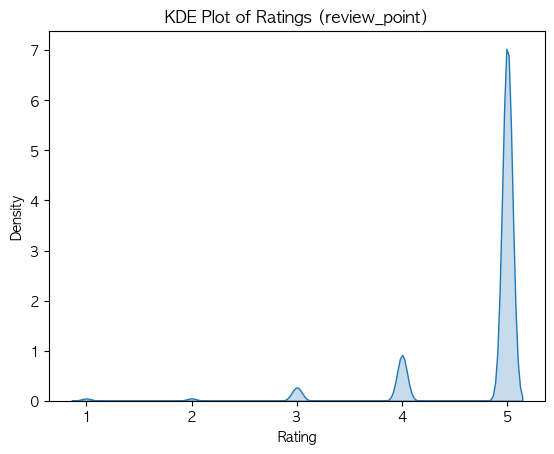

In [154]:
import seaborn as sns
import matplotlib.pyplot as plt



# KDE 시각화
sns.kdeplot(df['review_rating'], shade=True)
plt.title('KDE Plot of Ratings (review_point)')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.show()

In [171]:
df[df['user_id']=='화장품에월급다바침']

,user_id,user_code,brand_name,product_name,review,review_rating,review_date,purchase_channel,recommend_num,cleaned_review,sentiment_label,Sentiment Score,Sentiment_Label_Pred,repurchase,senti_score,senti_rp_score
79778,화장품에월급다바침,M0t0WlBEYmZEQVRZQ2JtZEdKMEc3UT09,삐아,[밀크컨실러(본품)증정기획] 삐아 오 스테이 컨실러 6colors,삐아 오 스테이 컨실러\n\n컨실러 라기 보다는 커버력있는 파운데이션\n파데에 컨실...,4,2024.09.24,온라인,2,삐 오 스테이 컨실러 컨실러 커버 있다 파운데이션 파다 컨실러 섞다 형 이다 꾸다 ...,1,0.022727,1,4,4.022727,8.022727
79779,화장품에월급다바침,M0t0WlBEYmZEQVRZQ2JtZEdKMEc3UT09,클리오,[NEW] 클리오 킬 커버 파운웨어 쿠션 디 오리지널 기획 (+라이트세팅파우더 증정),매장에 입고 되자 마자 전색상 며칠 간 테스트 했어요\n집에서 수정 화장도 해보고 ...,3,2024.09.02,온라인,42,매장 입다 되다 마자 색상 며칠 간 테스트 하다 집 수정 화장 해보다 덧 바르다 기...,0,0.173333,1,4,3.173333,7.173333
79780,화장품에월급다바침,M0t0WlBEYmZEQVRZQ2JtZEdKMEc3UT09,클리오,[NEW] 클리오 킬 커버 파운웨어 쿠션 디 오리지널 기획 (+라이트세팅파우더 증정),킬커버 쿠션 디 오리지널\n\n케이스가 남녀 모두 나이대 상관없이 쓸수있게\n나와서...,2,2024.09.05,온라인,8,킬 커버 쿠션 디 리지 널 케이스 남녀 모두 나이 상관없다 쓸다 나오다 좋다 색상 ...,0,0.087558,1,4,2.087558,6.087558
79781,화장품에월급다바침,M0t0WlBEYmZEQVRZQ2JtZEdKMEc3UT09,성분에디터,[올영픽/30ml+30ml] 성분에디터 머루포도 비타C 잡티앰플 30ml 1+1 더...,한달사용ㅡ두병다 씀\n\n@결론부터@\n\n글쌔요 피부잡티나 다크스팟 볼에 잡티\n...,3,2023.11.10,온라인,8,달 사용 병 쓰다 결론 글쌔 피부 잡 티나 다크 스팟 볼 잡티 여드름 색소 침착 저...,0,0.021277,1,2,3.021277,5.021277
79782,화장품에월급다바침,M0t0WlBEYmZEQVRZQ2JtZEdKMEc3UT09,성분에디터,[올영픽/30ml+30ml] 성분에디터 머루포도 비타C 잡티앰플 30ml 1+1 더...,포도수와 포도 추출물로 만든 이제품이\n실제 미백효과가 있을지 의문입니다\n오늘 발...,3,2023.10.10,온라인,12,포도 수 포도 추출 물 만들다 제품 실제 미백 효과 있다 의문 이다 오늘 발라 보다...,0,0.035971,1,2,3.035971,5.035971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79851,화장품에월급다바침,M0t0WlBEYmZEQVRZQ2JtZEdKMEc3UT09,브링그린,브링그린 프레시마스크 1매 5종,예전에는. 매일 마스크팩을 거의 10년간 했는데\n어느날부터 귀찬아서 안한다보니\n...,3,2024.09.26,온라인,1,예전 매일 마스크 팩 거의 년 하다 날 귀 차다 하다 보다 잡티 기미 생기다 보 관...,0,0.328947,1,2,3.328947,5.328947
79852,화장품에월급다바침,M0t0WlBEYmZEQVRZQ2JtZEdKMEc3UT09,삐아,[밀크컨실러(본품)증정기획] 삐아 오 스테이 컨실러 6colors,삐아 오 스테이 컨실러\n\n*성분\n무난하게 쓸성분입니다\n병풀. 건조감잡는성분ㆍ...,4,2024.09.03,온라인,16,삐 오 스테이 컨실러 성분 무난 하다 쓸다 성분 이다 병풀 건조 감 잡다 성분 정도...,1,0.028807,1,4,4.028807,8.028807
79853,화장품에월급다바침,M0t0WlBEYmZEQVRZQ2JtZEdKMEc3UT09,힌스,[엔하이픈/성훈PICK] 힌스 세컨 스킨 메쉬 매트 쿠션(본품+리필),파우치 땜에 샀고\n케이스는 시원하고 남자분들도 들고 다니기 좋으나\n성분이 맞지않...,1,2024.08.12,온라인,6,파우치 땜 사다 케이스 시원하다 남자 들다 다니다 좋다 성분 맞다 않다 방치 템 하...,0,0.142857,1,2,1.142857,3.142857
79854,화장품에월급다바침,M0t0WlBEYmZEQVRZQ2JtZEdKMEc3UT09,웨이크메이크,웨이크메이크 스파츌라 와이드 파운데이션 브러시 (퍼프듀오기획/단품),증정용이랑 판매용\n틀린가 해서 판매용 사봤어요\n\n기존에 증정용 집에서 쓰는거 ...,4,2023.09.05,온라인,18,증정 용이 판매 용 틀리다 하다 판매 용 사보다 기존 증정 용 집 쓰다 있다 결론 ...,1,0.023256,1,4,4.023256,8.023256


In [168]:
df[df['user_code']=='aVpIcGR5UUJTbmZVMkhIV0ZDdndhZz09']

,user_id,user_code,brand_name,product_name,review,review_rating,review_date,purchase_channel,recommend_num,cleaned_review,sentiment_label,Sentiment Score,Sentiment_Label_Pred,repurchase,senti_score,senti_rp_score
49876,블당,aVpIcGR5UUJTbmZVMkhIV0ZDdndhZz09,비레디,[10월 올영픽] 비레디 트루 톤 로션 33ml+33ml 리필 기획 (본품+리필),남편쓰라고 이걸로 결정했는데 제품온거 보니\n제가 쓰고 싶을정도에요 ㅎㅎ\n일단 용...,5,2023.08.11,온라인,38,남편 쓰다 걸 결정 하다 제품 오다 보다 제 쓰다 싶다 정도 일단 용기 부터 남다르...,1,0.301587,1,1,5.301587,6.301587
49877,블당,aVpIcGR5UUJTbmZVMkhIV0ZDdndhZz09,필리밀리,[SNS 대란템/6차재입고] 필리밀리 뿌리 볼륨 브러시,친구가 이 브러시 사용하는데 좋다고 추천해줘서\n저도 질러 봤어요 ㅎㅎ\n나이가 들...,5,2024.09.26,온라인,13,친구 이 브러시 사용 하다 좋다 추천 해주다 저 지르다 보다 나이 들다 머리카락 얇...,1,0.346939,1,2,5.346939,7.346939
49878,블당,aVpIcGR5UUJTbmZVMkhIV0ZDdndhZz09,필리밀리,[10월 올영픽] 필리밀리 말랑한조각스펀지(80P),선크림이나 비비크림 바를때 손에 묻히지\n않고 바르니 손이 덜 건조해져서 좋아요,5,2024.09.24,온라인,13,선크림 비비 크림 바르다 때 손 묻히다 않다 바르다 손 덜 건조하다 좋다,1,0.555556,1,4,5.555556,9.555556
49879,블당,aVpIcGR5UUJTbmZVMkhIV0ZDdndhZz09,어노브,어노브 볼륨 업 헤어픽서 200ml,뭉치지 않고 끈적임도 없디 자연스럽게 헤어 스타일\n고정이 잘되고 메세 워터 제형이...,5,2023.12.04,온라인,30,뭉치 않다 끈 적임 없다 자연 헤어 스타일 고정 되다 메다 워터 형 남다 자다 정 ...,1,0.450000,1,2,5.450000,7.450000
49880,블당,aVpIcGR5UUJTbmZVMkhIV0ZDdndhZz09,필리밀리,[10월 올영픽] 필리밀리 말랑한조각스펀지(80P),화운데이션 바를때 사용하는데 손에\n묻지 않고 화장춤도 잘 발라져서 좋아요,5,2024.10.04,온라인,0,화운데이션 바르다 때 사용 하다 손 묻다 않다 화장 춤 자다 바르다 좋다,1,0.555556,1,4,5.555556,9.555556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181366,블당,aVpIcGR5UUJTbmZVMkhIV0ZDdndhZz09,메디힐,[37관왕] 메디힐 워터마이드 속보습 패드 100매,토너패드 좋다는건 거의 다 써본듯해요 그중 쵝오 ㅎㅎ메디힐껀 원단도 비건 인증 사각...,5,2023.06.28,온라인,31,토너 패드 좋다 거의 써다 보다 해 쵝오 메디힐껀 원단 비건 인증 패드 넘다 부드럽...,1,0.391304,1,3,5.391304,8.391304
181367,블당,aVpIcGR5UUJTbmZVMkhIV0ZDdndhZz09,메디힐,[37관왕] 메디힐 마데카소사이드 흔적 패드 100매,초딩6딸이 쓰는건데 세안 꼼꼼히 못해서 이거로 닦아내고 팩처럼도 하니 여드름 덜 생...,5,2023.06.14,온라인,30,초딩 딸 쓰다 세안 꼼꼼하다 하다 거 닦다 팩 하니 여드름 덜 생기다 해,1,0.111111,1,4,5.111111,9.111111
181368,블당,aVpIcGR5UUJTbmZVMkhIV0ZDdndhZz09,메디힐,[37관왕] 메디힐 마데카소사이드 흔적 패드 100매,"토너패드 야* , 파*, 등등 다른데것도 써봤는데 원형만 쓰다가 사각 토너패드는 첨...",5,2023.05.04,온라인,32,토너 패드 파 등등 다르다 써다 보다 원형 쓰다 사각 토너 패드 첨 메다 힐 넘다 ...,1,0.440000,1,4,5.440000,9.440000
181369,블당,aVpIcGR5UUJTbmZVMkhIV0ZDdndhZz09,필리밀리,필리밀리 부드러운 샤워볼,샤워할때 샤워볼아 부드럽고 거픔도 잘나서 만족하며 잘 사용중이에요,5,2023.04.05,매장,29,샤워 하다 때 샤워 볼 부드럽다 거픔 잘나다 만족하다 자다 사용,1,0.777778,1,4,5.777778,9.777778
